In [19]:
imagedir = '/Users/jacob/Library/CloudStorage/Dropbox/CollectiveBehavior/Presentations+Conferences/2024-09 Symposium - rodent social behavior/'

/var/folders/sq/f41r2kzn2ngbwmv7p9lqfvp40000gp/T/ipykernel_79698/1456721544.py:100: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap("tab20", len(tools))
/var/folders/sq/f41r2kzn2ngbwmv7p9lqfvp40000gp/T/ipykernel_79698/1456721544.py:145: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


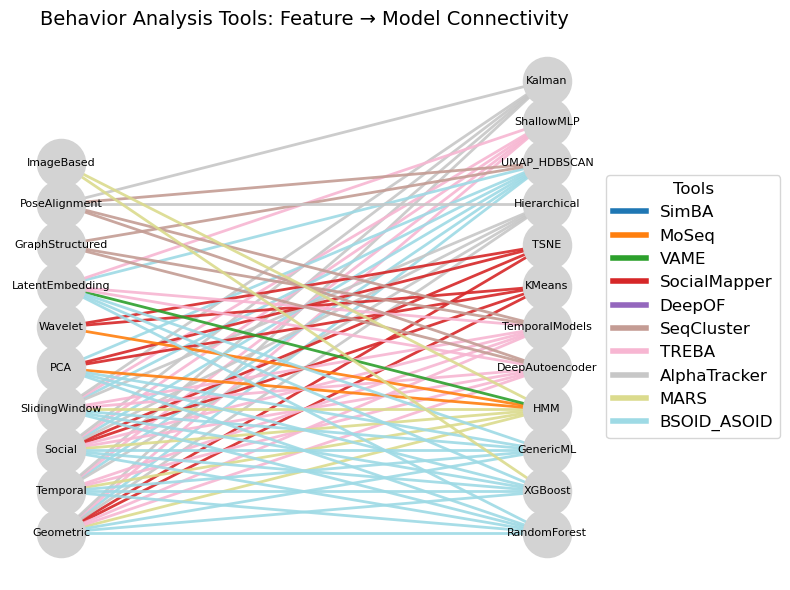

In [25]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools
import random

# ---------------------------
#  NODES (Left = Features, Right = Models)
# ---------------------------

features = [
    "Geometric",
    "Temporal",
    "Social",
    "SlidingWindow",
    "PCA",
    "Wavelet",
    "LatentEmbedding",
    "GraphStructured",
    "PoseAlignment",
    "ImageBased",
]

models = [
    "RandomForest",
    "XGBoost",
    "GenericML",
    "HMM",
    "DeepAutoencoder",
    "TemporalModels",
    "KMeans",
    "TSNE",
    "Hierarchical",
    "UMAP_HDBSCAN",
    "ShallowMLP",
    "Kalman",
]

# -----------------------------------------
# TOOL–FEATURE–MODEL MAPPING (from your table)
# -----------------------------------------

tools = {
    "SimBA": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow"],
        "models": ["RandomForest"],
    },
    "MoSeq": {
        "features": ["Geometric", "Temporal", "PCA", "Wavelet"],
        "models": ["HMM"],
    },
    "VAME": {
        "features": ["Temporal", "SlidingWindow", "LatentEmbedding"],
        "models": ["HMM", "DeepAutoencoder", "TemporalModels"],
    },
    "SocialMapper": {
        "features": ["Geometric", "Social", "PCA", "Wavelet"],
        "models": ["KMeans", "TSNE"],
    },
    "DeepOF": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "LatentEmbedding"],
        "models": ["RandomForest", "DeepAutoencoder"],
    },
    "SeqCluster": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "LatentEmbedding", "GraphStructured", "PoseAlignment"],
        "models": ["DeepAutoencoder", "TemporalModels", "UMAP_HDBSCAN"],
    },
    "TREBA": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "LatentEmbedding"],
        "models": ["DeepAutoencoder", "TemporalModels", "ShallowMLP"],
    },
    "AlphaTracker": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "PoseAlignment"],
        "models": ["Hierarchical", "Kalman"],
    },
    "MARS": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "ImageBased"],
        "models": ["XGBoost", "HMM"],
    },
    "BSOID_ASOID": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "PCA", "LatentEmbedding"],
        "models": ["RandomForest", "XGBoost", "GenericML", "UMAP_HDBSCAN"],
    },
}

# ---------------------------
#  BUILD GRAPH
# ---------------------------

G = nx.Graph()

# Add nodes with bipartite attribute
for f in features:
    G.add_node(f, bipartite=0, type="feature")

for m in models:
    G.add_node(m, bipartite=1, type="model")

# Assign each tool a unique color
color_map = {}
palette = plt.cm.get_cmap("tab20", len(tools))
for i, tool in enumerate(tools.keys()):
    color_map[tool] = palette(i)

# Create edges: Feature → Model for each tool
edge_colors = []
for tool, data in tools.items():
    for f in data["features"]:
        for m in data["models"]:
            G.add_edge(f, m, tool=tool)
            edge_colors.append(color_map[tool])

# ---------------------------
#  POSITIONS (bipartite layout)
# ---------------------------

pos = {}
# left column
for i, f in enumerate(features):
    pos[f] = (-1, i)

# right column
for i, m in enumerate(models):
    pos[m] = (1, i)

# ---------------------------
#  DRAWING
# ---------------------------

fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color="lightgray")
nx.draw_networkx_labels(G, pos, font_size=8)

# Draw edges colored by tool
edges = G.edges()
edge_colors = [color_map[G[u][v]['tool']] for u, v in edges]
nx.draw_networkx_edges(G, pos, width=2.0, edge_color=edge_colors, alpha=0.9)

# Legend
for tool, color in color_map.items():
    plt.plot([], [], color=color, label=tool, linewidth=4)

plt.legend(title="Tools", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12, title_fontsize=12)
plt.axis("off")
plt.title("Behavior Analysis Tools: Feature → Model Connectivity", fontsize=14)
plt.tight_layout() 
plt.savefig(imagedir+'Feature-Model graph.pdf')
plt.show()

## Spring layout (but edges are wrong because they get overwritten)

/var/folders/sq/f41r2kzn2ngbwmv7p9lqfvp40000gp/T/ipykernel_79698/131199640.py:100: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap("tab20", len(tools))


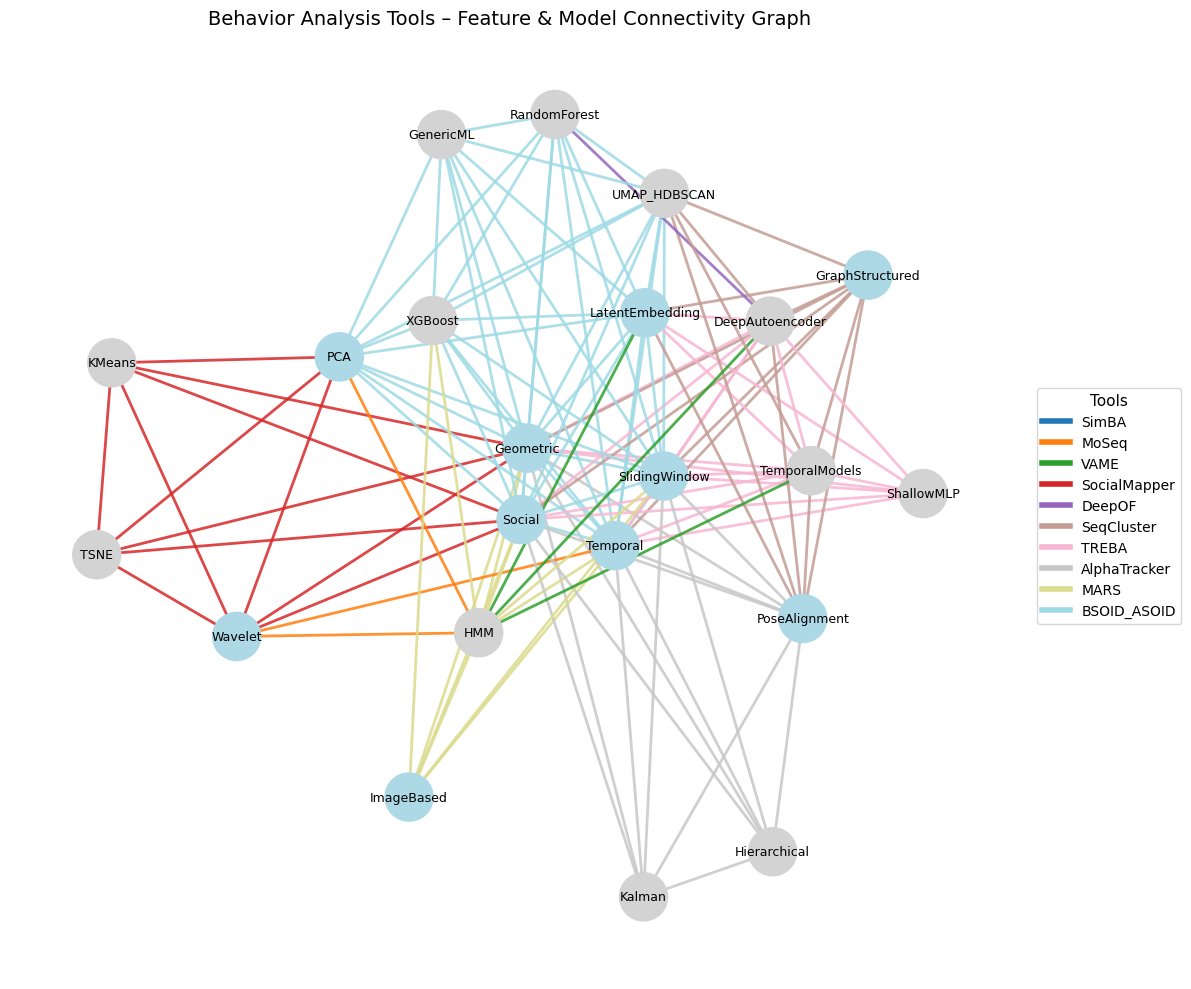

In [40]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools

# ---------------------------
#  NODES (Features, Models)
# ---------------------------

features = [
    "Geometric",
    "Temporal",
    "Social",
    "SlidingWindow",
    "PCA",
    "Wavelet",
    "LatentEmbedding",
    "GraphStructured",
    "PoseAlignment",
    "ImageBased",
]

models = [
    "RandomForest",
    "XGBoost",
    "GenericML",
    "HMM",
    "DeepAutoencoder",
    "TemporalModels",
    "KMeans",
    "TSNE",
    "Hierarchical",
    "UMAP_HDBSCAN",
    "ShallowMLP",
    "Kalman",
]

# ---------------------------
# TOOL–FEATURE–MODEL MAPPING
# ---------------------------

tools = {
    "SimBA": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow"],
        "models": ["RandomForest"],
    },
    "MoSeq": {
        "features": ["Geometric", "Temporal", "PCA", "Wavelet"],
        "models": ["HMM"],
    },
    "VAME": {
        "features": ["Temporal", "SlidingWindow", "LatentEmbedding"],
        "models": ["HMM", "DeepAutoencoder", "TemporalModels"],
    },
    "SocialMapper": {
        "features": ["Geometric", "Social", "PCA", "Wavelet"],
        "models": ["KMeans", "TSNE"],
    },
    "DeepOF": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "LatentEmbedding"],
        "models": ["RandomForest", "DeepAutoencoder"],
    },
    "SeqCluster": {
        "features": [
            "Geometric", "Temporal", "Social", "SlidingWindow",
            "LatentEmbedding", "GraphStructured", "PoseAlignment"
        ],
        "models": ["DeepAutoencoder", "TemporalModels", "UMAP_HDBSCAN"],
    },
    "TREBA": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "LatentEmbedding"],
        "models": ["DeepAutoencoder", "TemporalModels", "ShallowMLP"],
    },
    "AlphaTracker": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "PoseAlignment"],
        "models": ["Hierarchical", "Kalman"],
    },
    "MARS": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "ImageBased"],
        "models": ["XGBoost", "HMM"],
    },
    "BSOID_ASOID": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "PCA", "LatentEmbedding"],
        "models": ["RandomForest", "XGBoost", "GenericML", "UMAP_HDBSCAN"],
    },
}

# ---------------------------
# BUILD GRAPH
# ---------------------------

G = nx.Graph()

# Add nodes
for f in features:
    G.add_node(f, type="feature")
for m in models:
    G.add_node(m, type="model")

# Assign tool colors
palette = plt.cm.get_cmap("tab20", len(tools))
tool_colors = {tool: palette(i) for i, tool in enumerate(tools)}

# Add edges for Feature → Model, Feature → Feature, Model → Model
for tool, data in tools.items():

    feats = data["features"]
    mods = data["models"]

    # Feature → Model edges
    for f in feats:
        for m in mods:
            G.add_edge(f, m, tool=tool)

    # Feature → Feature edges (fully connected per tool)
    for f1, f2 in itertools.combinations(feats, 2):
        G.add_edge(f1, f2, tool=tool)

    # Model → Model edges (fully connected per tool)
    for m1, m2 in itertools.combinations(mods, 2):
        G.add_edge(m1, m2, tool=tool)

# ---------------------------
# LAYOUT (spring embedding)
# ---------------------------

pos = nx.spring_layout(G, k=0.8, iterations=200, seed=3)

# ---------------------------
# DRAWING
# ---------------------------

fig, ax = plt.subplots(figsize=(12, 10))

# Draw nodes
nx.draw_networkx_nodes(
    G, pos,
    node_size=1200,
    node_color=["lightblue" if G.nodes[n]["type"] == "feature" else "lightgray" for n in G.nodes]
)

nx.draw_networkx_labels(G, pos, font_size=9)

# Draw edges colored by tool
edges = G.edges()
edge_colors = [tool_colors[G[u][v]['tool']] for u, v in edges]
nx.draw_networkx_edges(G, pos, width=2.0, edge_color=edge_colors, alpha=0.85)

# Legend
for tool, color in tool_colors.items():
    plt.plot([], [], color=color, label=tool, linewidth=4)

plt.legend(
    title="Tools",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize=10,
    title_fontsize=11,
)

plt.title("Behavior Analysis Tools – Feature & Model Connectivity Graph", fontsize=14)
plt.axis("off")

plt.tight_layout()
plt.show()

## One plot per tool

/var/folders/sq/f41r2kzn2ngbwmv7p9lqfvp40000gp/T/ipykernel_79698/1477773167.py:127: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap("tab20", len(tools))


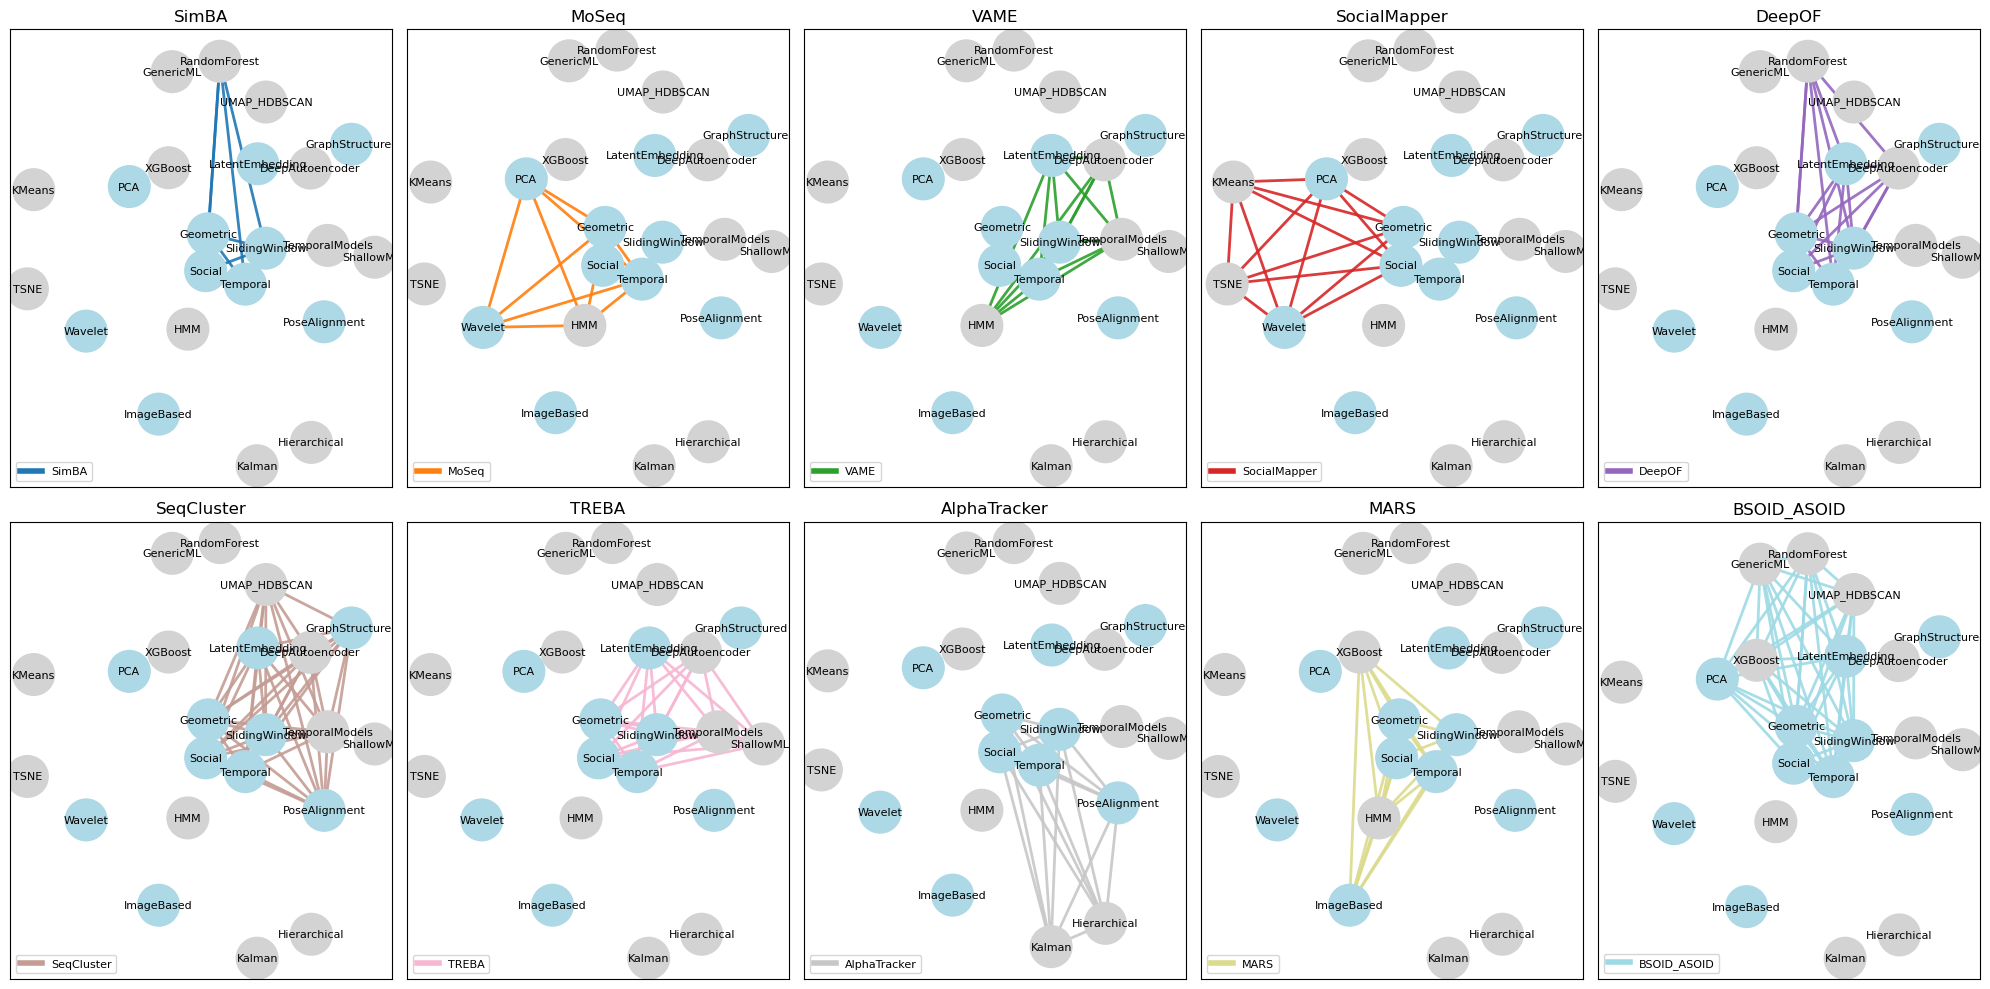

In [47]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools

# ---------------------------
#  NODES (Features, Models)
# ---------------------------

features = [
    "Geometric",
    "Temporal",
    "Social",
    "SlidingWindow",
    "PCA",
    "Wavelet",
    "LatentEmbedding",
    "GraphStructured",
    "PoseAlignment",
    "ImageBased",
]

models = [
    "RandomForest",
    "XGBoost",
    "GenericML",
    "HMM",
    "DeepAutoencoder",
    "TemporalModels",
    "KMeans",
    "TSNE",
    "Hierarchical",
    "UMAP_HDBSCAN",
    "ShallowMLP",
    "Kalman",
]

# ---------------------------
# TOOL–FEATURE–MODEL MAPPING
# ---------------------------

tools = {
    "SimBA": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow"],
        "models": ["RandomForest"],
    },
    "MoSeq": {
        "features": ["Geometric", "Temporal", "PCA", "Wavelet"],
        "models": ["HMM"],
    },
    "VAME": {
        "features": ["Temporal", "SlidingWindow", "LatentEmbedding"],
        "models": ["HMM", "DeepAutoencoder", "TemporalModels"],
    },
    "SocialMapper": {
        "features": ["Geometric", "Social", "PCA", "Wavelet"],
        "models": ["KMeans", "TSNE"],
    },
    "DeepOF": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "LatentEmbedding"],
        "models": ["RandomForest", "DeepAutoencoder"],
    },
    "SeqCluster": {
        "features": [
            "Geometric", "Temporal", "Social", "SlidingWindow",
            "LatentEmbedding", "GraphStructured", "PoseAlignment"
        ],
        "models": ["DeepAutoencoder", "TemporalModels", "UMAP_HDBSCAN"],
    },
    "TREBA": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "LatentEmbedding"],
        "models": ["DeepAutoencoder", "TemporalModels", "ShallowMLP"],
    },
    "AlphaTracker": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "PoseAlignment"],
        "models": ["Hierarchical", "Kalman"],
    },
    "MARS": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "ImageBased"],
        "models": ["XGBoost", "HMM"],
    },
    "BSOID_ASOID": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "PCA", "LatentEmbedding"],
        "models": ["RandomForest", "XGBoost", "GenericML", "UMAP_HDBSCAN"],
    },
}

# ---------------------------
# BUILD GRAPH (for layout only)
# ---------------------------

G = nx.Graph()

# Add nodes
for f in features:
    G.add_node(f, type="feature")
for m in models:
    G.add_node(m, type="model")

# Add *unlabeled* edges so spring_layout "feels" the connectivity
for data in tools.values():
    feats = data["features"]
    mods = data["models"]

    # Feature ↔ Model
    for f in feats:
        for m in mods:
            G.add_edge(f, m)

    # Feature ↔ Feature
    for f1, f2 in itertools.combinations(feats, 2):
        G.add_edge(f1, f2)

    # Model ↔ Model
    for m1, m2 in itertools.combinations(mods, 2):
        G.add_edge(m1, m2)

# ---------------------------
# LAYOUT (spring embedding) – shared across all plots
# ---------------------------

pos = nx.spring_layout(G, k=0.8, iterations=200, seed=3)

# ---------------------------
# COLORS (one per tool)
# ---------------------------

palette = plt.cm.get_cmap("tab20", len(tools))
tool_colors = {tool: palette(i) for i, tool in enumerate(tools)}

# ---------------------------
# LOOP: one plot per tool
# ---------------------------

import matplotlib.pyplot as plt
import networkx as nx
import itertools

# --- existing: features, models, tools, G, pos, tool_colors ---

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for ax, (tool, data) in zip(axes, tools.items()):
    feats = data["features"]
    mods = data["models"]

    # Compute edges for this tool (do NOT rely on G's stored edges)
    fm_edges = [(f, m) for f in feats for m in mods]
    ff_edges = list(itertools.combinations(feats, 2))
    mm_edges = list(itertools.combinations(mods, 2))
    all_edges = fm_edges + ff_edges + mm_edges

    # --- draw nodes ---
    node_colors = [
        "lightblue" if G.nodes[n]["type"] == "feature" else "lightgray"
        for n in G.nodes
    ]
    nx.draw_networkx_nodes(G, pos, node_size=900, node_color=node_colors, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)

    # --- draw edges for THIS TOOL ONLY ---
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=all_edges,
        width=2.0,
        edge_color=tool_colors[tool],
        alpha=0.90,
        ax=ax,
    )

    # Title and legend
    ax.set_title(tool, fontsize=12)
    ax.plot([], [], color=tool_colors[tool], linewidth=4, label=tool)
    ax.legend(loc="lower left", fontsize=8)
    ax.axis()

plt.tight_layout()
plt.show()

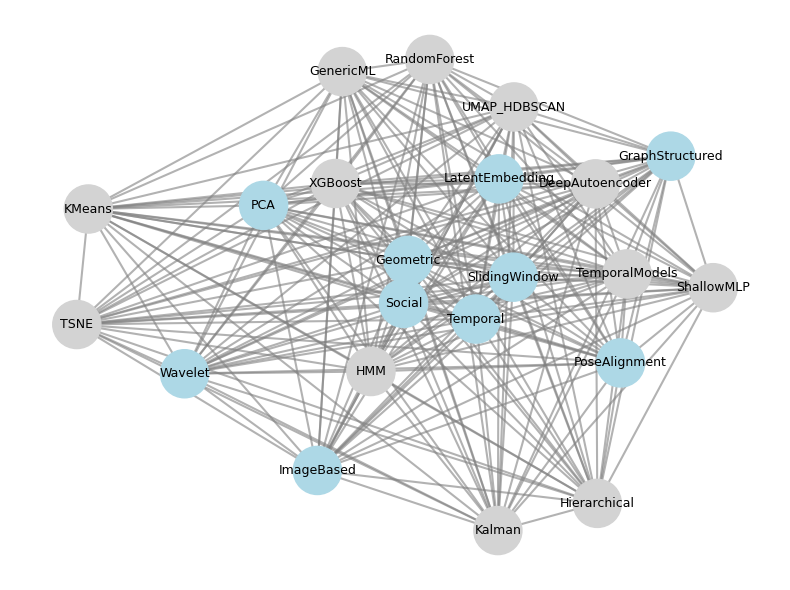

In [54]:
# ----------------------------------------------------
#  FULL CONNECTIVITY GRAPH (all-to-all connections)
# ----------------------------------------------------

import matplotlib.pyplot as plt
import networkx as nx
import itertools

# Use the same G, pos, and node colors from earlier
# Create list of all unordered node pairs (complete graph)
all_nodes = list(G.nodes())
all_edges = list(itertools.combinations(all_nodes, 2))

# Turquoise color
turquoise = 'gray'

fig, ax = plt.subplots(figsize=(8,6))

# Draw nodes
node_colors = [
    "lightblue" if G.nodes[n]["type"] == "feature" else "lightgray"
    for n in G.nodes
]
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color=node_colors, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=9, ax=ax)

# Draw all edges in turquoise
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=all_edges,
    width=1.5,
    edge_color=turquoise,
    alpha=0.6,
    ax=ax
)

# ax.set_title("Full Connectivity Graph (All Nodes Connected)", fontsize=14)
ax.axis("off")

plt.tight_layout()
plt.show()

## Weighted graph

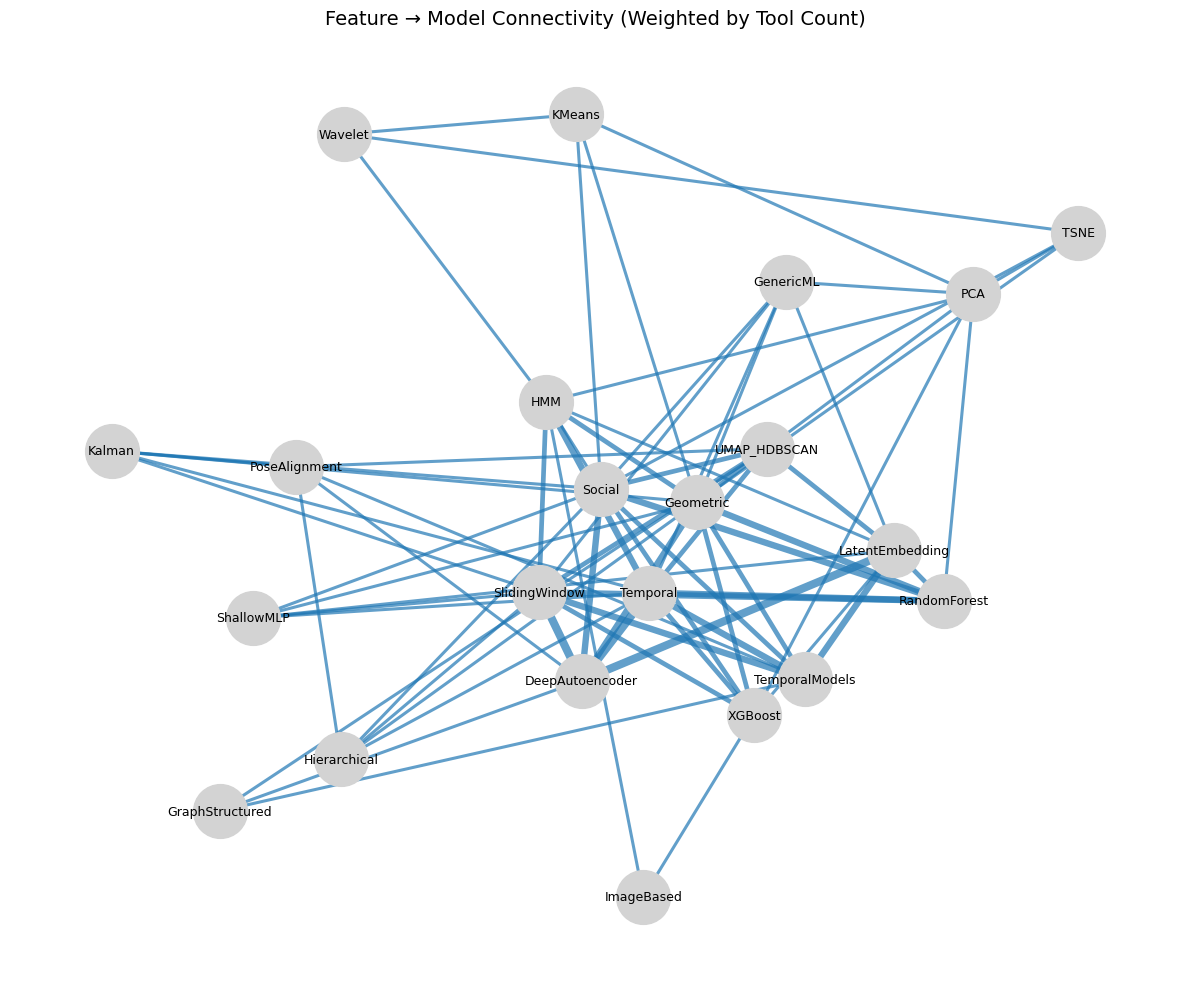

In [39]:
import matplotlib.pyplot as plt
import networkx as nx

# ---------------------------
#  NODES (Features and Models)
# ---------------------------

features = [
    "Geometric", "Temporal", "Social", "SlidingWindow", "PCA",
    "Wavelet", "LatentEmbedding", "GraphStructured", "PoseAlignment", "ImageBased"
]

models = [
    "RandomForest", "XGBoost", "GenericML", "HMM", "DeepAutoencoder",
    "TemporalModels", "KMeans", "TSNE", "Hierarchical",
    "UMAP_HDBSCAN", "ShallowMLP", "Kalman"
]

# TOOL MAPPINGS (USE YOUR LATEST VERSION)
tools = {
    "SimBA": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow"],
        "models": ["RandomForest"],
    },
    "MoSeq": {
        "features": ["Geometric", "Temporal", "PCA", "Wavelet"],
        "models": ["HMM"],
    },
    "VAME": {
        "features": ["Temporal", "SlidingWindow", "LatentEmbedding"],
        "models": ["HMM", "DeepAutoencoder", "TemporalModels"],
    },
    "SocialMapper": {
        "features": ["Geometric", "Social", "PCA", "Wavelet"],
        "models": ["KMeans", "TSNE"],
    },
    "DeepOF": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "LatentEmbedding"],
        "models": ["RandomForest", "DeepAutoencoder"],
    },
    "SeqCluster": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "LatentEmbedding", 
                     "GraphStructured", "PoseAlignment"],
        "models": ["DeepAutoencoder", "TemporalModels", "UMAP_HDBSCAN"],
    },
    "TREBA": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "LatentEmbedding"],
        "models": ["DeepAutoencoder", "TemporalModels", "ShallowMLP"],
    },
    "AlphaTracker": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "PoseAlignment"],
        "models": ["Hierarchical", "Kalman"],
    },
    "MARS": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "ImageBased"],
        "models": ["XGBoost", "HMM"],
    },
    "BSOID_ASOID": {
        "features": ["Geometric", "Temporal", "Social", "SlidingWindow", "PCA", "LatentEmbedding"],
        "models": ["RandomForest", "XGBoost", "GenericML", "UMAP_HDBSCAN"],
    },
}

# ---------------------------
#  BUILD WEIGHTED GRAPH
# ---------------------------

G = nx.Graph()

# Add nodes
for f in features:
    G.add_node(f, type="feature")
for m in models:
    G.add_node(m, type="model")

# Count connections (feature, model) → weight
edge_weights = {}

for tool, data in tools.items():
    for f in data["features"]:
        for m in data["models"]:
            key = (f, m)
            edge_weights[key] = edge_weights.get(key, 0) + 1

# Add weighted edges
for (f, m), w in edge_weights.items():
    G.add_edge(f, m, weight=w)

# ---------------------------
#  SPRING LAYOUT
# ---------------------------
pos = nx.spring_layout(G, k=1.5, seed=42)

# ---------------------------
#  DRAW GRAPH
# ---------------------------
plt.figure(figsize=(12, 10))

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color="lightgray")

# Labels
nx.draw_networkx_labels(G, pos, font_size=9)

# Weighted edges: thicker = more tools use F→M
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos,
                       width=[1 + w*1.2 for w in weights],
                       edge_color="tab:blue",
                       alpha=0.7)

plt.title("Feature → Model Connectivity (Weighted by Tool Count)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()